#  e-commerce 행동 데이터 분석

E-commerce 행동(상품 구매) 데이터


https://archive.ics.uci.edu/ml/datasets/online+retail

### data description(데이터 명세)
```
No.,변수명,설명
1,InvoiceNo: 주문 번호
2,StockCode: 상품 코드
3,Description: 상품 설명
4,Quantity: 주문 수량
5,InvoiceDate: 주문 일자
6,UnitPrice: 상품 가격 (unit price)
7,CustomerI: 고객 ID
8,Country: 국가명
```


### 데이터 분석 목적
- E-commerce 데이터를 분석하여 마케팅, 영업 의사결정에 활용한다.
- 이때 소비자들을 RFM기반 분석하여 의사 결정을 용이하게 보조한다.


## RFM 분석이란
 - CRM(Customer relationship managemet)에서 많이 활용되는 고객 가치 분석 방법론
 - RFM은 Recency, Frequency, Monetary의 약자
  - Recency: 고객이 얼마나 자주 방문했는가? 우리가 원하는 특정 행동을 얼마나 자주 했는지를 의미한다.
  - Frequency: 고객이 얼마나 자주 방문했는가? 우리가 원하는 특정 행동을 얼마나 자주 했는지를 의미한다.(행동 빈도, 특정 행동 정의하고 비교)
  - Monetary: 고객이 돈을 많이 쓰는가? 우리가 원하는 특정 행동에서 많은 양적 구매를 하는지를 의미한다. (고객의 장바구니에 들어간 물건의 갯수 등)
  - 이 3가지로 고객 분석



--> 완벽하진 않아서 제한적이지만 현업에서 잘 쓰일 수 있는 방법론

 - RFM 분석은 각 고객의 구매(행동) 패턴에 따라 고객을 분류하여 최우선 고객을 식별하고 마케팅 전략을 수립하는데 도움이 됨.
 - 일반적으로 고객을 4~5개 세그먼트로 분류(등급).

In [1]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
#import pandas_profiling
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

# library for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

## 1. Data Processing 1

In [2]:
df = pd.read_csv("./sample_data/e_commerce.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 1-2 Duplicated Data 확인

In [3]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [4]:
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 5268


In [5]:
df = df.drop_duplicates().reset_index(drop=True)

## 2. Data EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [7]:
# categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

InvoiceNo object ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode object ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Description object ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity int64 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
 

In [8]:
list_cast_to_object = ["CustomerID"]
for column_name in list_cast_to_object:
  df[column_name] = df[column_name].astype(object)

In [9]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns)
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

536641
8
6
2


In [10]:
list_numeric_columns

['Quantity', 'UnitPrice']

In [11]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

### Independent(독립) Data Explore

#### 1) Categorical Data Analysis

##### 불필요한 컬럼 확인

In [12]:
df[list_categorical_columns].nunique().sort_values()


Country           38
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

In [13]:

df = df.drop(["Description"], axis=1)
list_categorical_columns.remove("Description")

In [14]:
list_categorical_columns

['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Country']

##### Column별 분포 확인

<Axes: xlabel='StockCode', ylabel='Count'>

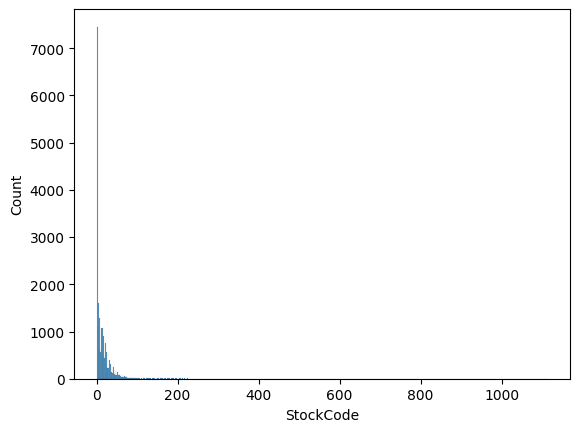

In [15]:

df_invoiceno_count = df.groupby("InvoiceNo").count()["StockCode"]
sns.histplot(df_invoiceno_count)

In [16]:
df_invoiceno_count

InvoiceNo
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
C581484     1
C581490     2
C581499     1
C581568     1
C581569     2
Name: StockCode, Length: 25900, dtype: int64

<Axes: >

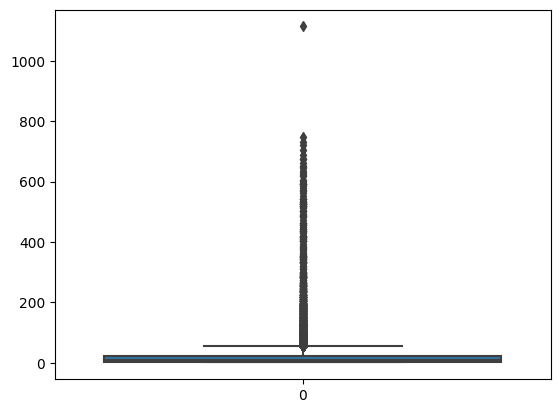

In [17]:
sns.boxplot(df_invoiceno_count)

In [18]:
df_invoiceno_count.describe()



count    25900.000000
mean        20.719730
std         42.793088
min          1.000000
25%          2.000000
50%         10.000000
75%         23.000000
max       1114.000000
Name: StockCode, dtype: float64

In [19]:
no_invoice_max = df_invoiceno_count[df_invoiceno_count == 1114]
print(no_invoice_max.index[0])
df[df.InvoiceNo == no_invoice_max.index[0]]


573585


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
426616,573585,11001,2,10/31/2011 14:41,3.29,NaN,United Kingdom
426617,573585,15036,15,10/31/2011 14:41,1.63,NaN,United Kingdom
426618,573585,15039,15,10/31/2011 14:41,1.63,NaN,United Kingdom
426619,573585,15056BL,1,10/31/2011 14:41,12.46,NaN,United Kingdom
426620,573585,15056N,1,10/31/2011 14:41,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...
427725,573585,90209C,3,10/31/2011 14:41,2.07,NaN,United Kingdom
427726,573585,90214S,1,10/31/2011 14:41,0.83,NaN,United Kingdom
427727,573585,DOT,1,10/31/2011 14:41,2019.05,NaN,United Kingdom
427728,573585,gift_0001_20,1,10/31/2011 14:41,16.67,NaN,United Kingdom


--> Nan이기도하고, 1118은 너무 동떨어지 아웃라이어 --> 제거해볼 필요성 있어보임.

In [20]:
df = df.dropna().reset_index(drop=True)

<Axes: >

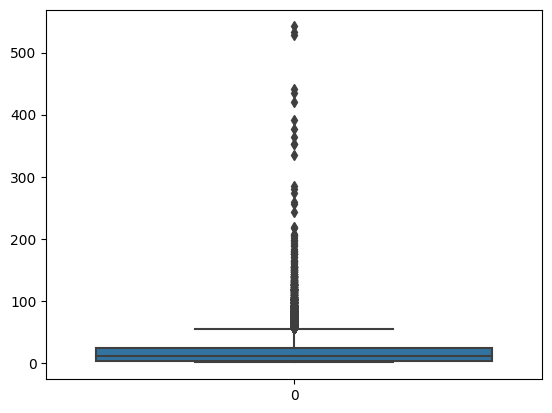

In [21]:
df_invoiceno_count = df.groupby("InvoiceNo").count()["StockCode"]
sns.boxplot(df_invoiceno_count)

In [22]:
df_invoiceno_count.describe()

count    22190.000000
mean        18.098423
std         23.363888
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        542.000000
Name: StockCode, dtype: float64

In [23]:
no_invoice_max = df_invoiceno_count[df_invoiceno_count == 542]
print(no_invoice_max.index[0])
df[df.InvoiceNo == no_invoice_max.index[0]]

576339


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
347900,576339,10135,14,11/14/2011 15:27,2.46,14096.0,United Kingdom
347901,576339,15044A,1,11/14/2011 15:27,5.79,14096.0,United Kingdom
347902,576339,16238,2,11/14/2011 15:27,0.42,14096.0,United Kingdom
347903,576339,16258A,1,11/14/2011 15:27,0.83,14096.0,United Kingdom
347904,576339,17003,2,11/14/2011 15:27,0.63,14096.0,United Kingdom
...,...,...,...,...,...,...,...
348437,576339,90083,1,11/14/2011 15:27,1.63,14096.0,United Kingdom
348438,576339,90086,1,11/14/2011 15:27,1.63,14096.0,United Kingdom
348439,576339,90119,11,11/14/2011 15:27,2.46,14096.0,United Kingdom
348440,576339,90166,1,11/14/2011 15:27,4.15,14096.0,United Kingdom


In [24]:
df.StockCode.nunique()

3684

In [25]:
no_stockcode_buy = df.groupby("StockCode").count()["InvoiceNo"]

In [26]:
no_stockcode_buy.sort_values(ascending=False)

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90176B       1
90176C       1
90069        1
90035C       1
37461        1
Name: InvoiceNo, Length: 3684, dtype: int64

In [27]:
no_stockcode_buy.describe()

count    3684.000000
mean      109.013029
std       165.656870
min         1.000000
25%        12.000000
50%        48.000000
75%       137.000000
max      2065.000000
Name: InvoiceNo, dtype: float64

In [28]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate)

In [29]:
df_tmp = df

In [30]:
df_tmp["weekday"] = df.InvoiceDate.dt.weekday
df_tmp["month"] = df.InvoiceDate.dt.month
df_tmp["hour"] = df.InvoiceDate.dt.hour

In [31]:
df_tmp.head(2)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekday,month,hour
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,12,8
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8


<Axes: xlabel='weekday'>

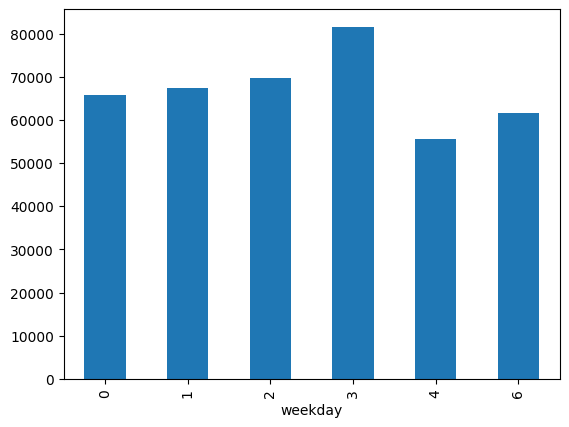

In [32]:
df_tmp.groupby("weekday").count()["Quantity"].plot.bar()
# 금요일 데이터는 없음 -> 누락 가능성.

<Axes: xlabel='month'>

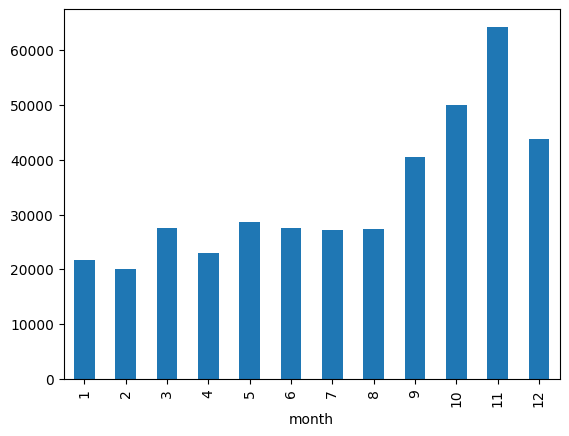

In [33]:
df_tmp.groupby("month").count()["Quantity"].plot.bar()

<Axes: xlabel='hour'>

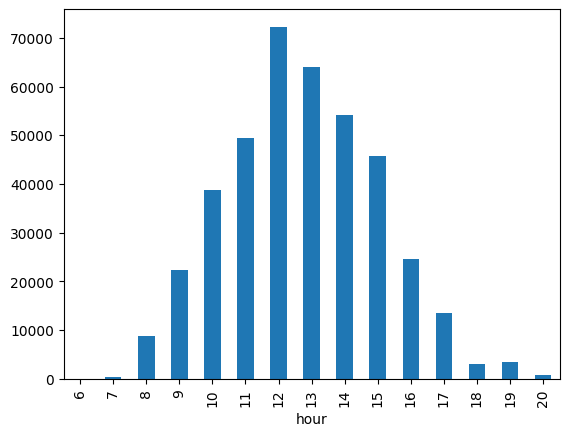

In [34]:
df_tmp.groupby("hour").count()["Quantity"].plot.bar()

In [35]:
del df_tmp

In [36]:
df.Country.nunique()

37

<Axes: xlabel='Country'>

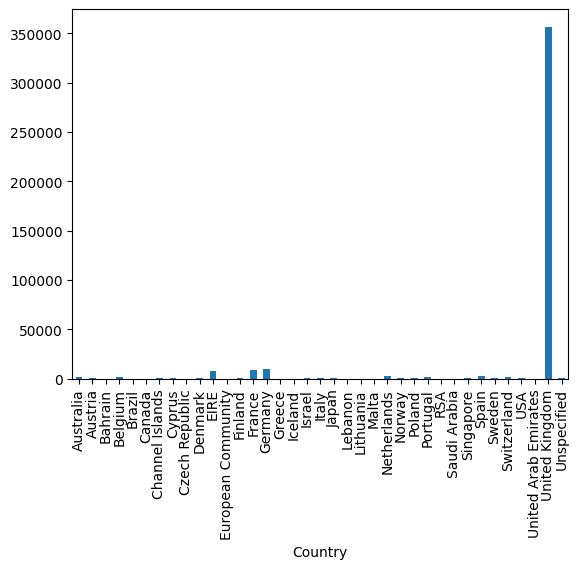

In [37]:
df.groupby("Country").count()["Quantity"].plot.bar()

##### Insight
1.   한 개 구매건(invoice)별로 다양한 상품을 구매한다.
2.   일부 잘 팔리는 제품이 있다.
3.   평일에 주말보다 많은 상품이 판매된다. 특히 목요일 판매가 높다. 단,금요일 데이터는 확인되지 않는다.
4.   정오에 가장 많은 상품이 결제된다.
5.   겨울에 더 판매율이 높다. 특히 11월에 가장 많다.
6.   해당 데이터는 대부분 영국 구매 데이터 위주다.

--> 이를 기반으로 RFM모델을 만들것이다.
--> 이외에도 마켓팅의 의사결정에 사용가능.

#### 2) Numeric Data Analysis

##### 불필요한 컬럼 확인

In [38]:
df[list_numeric_columns].nunique().sort_values()

Quantity     436
UnitPrice    620
dtype: int64

In [39]:
df[list_numeric_columns].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


--> min이 음수로 나옴, 확인필요--> 환불데이터로 확인됨

##### Column별 분포 확인

In [40]:
df[df.Quantity < 0 ]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekday,month,hour
141,C536379,D,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2,12,9
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2,12,9
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2,12,10
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2,12,10
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2,12,10
...,...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,4,12,9
401243,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,4,12,10
401410,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,4,12,11
401411,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,4,12,11


In [43]:
df = df[df.Quantity > 0]

In [44]:
df[list_numeric_columns].describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


<Axes: >

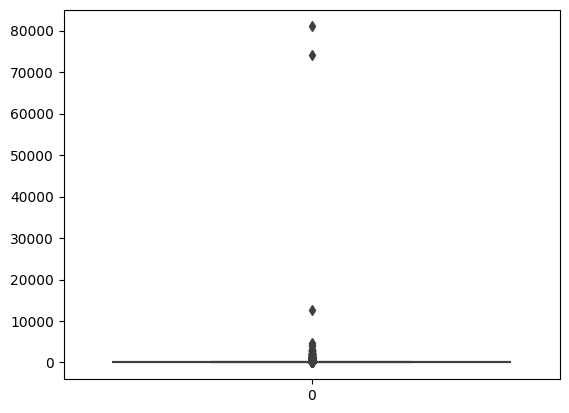

In [45]:
sns.boxplot(df["Quantity"])
# 너무 큰 이상치는 제거

In [46]:
df = df[df.Quantity < 10000]

<Axes: >

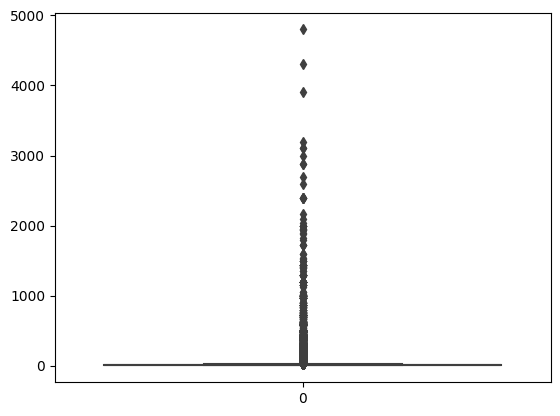

In [47]:
sns.boxplot(df["Quantity"])

<Axes: >

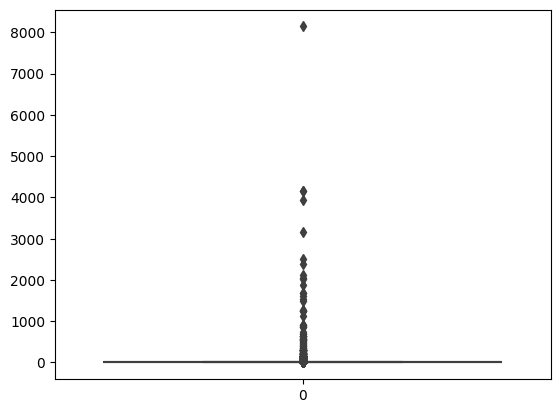

In [48]:
sns.boxplot(df["UnitPrice"])

##### Insight
1.   일부 너무 큰 quantity가 구매된 것은 outlier로 제외

## 3. Data Processing 2

### 3-1 Missing Values

In [49]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
weekday        0
month          0
hour           0
dtype: int64

### 3-2 Feature Engineering
*   RFM을 구하기 위한 Feature 생성
*   Recency Feature
*   Frequency Feature
*   Monetary Feature

여기서는 행동을 구매로

In [50]:
df.head(1)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekday,month,hour
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,12,8


In [53]:
# Recency Feature : 가장 최근에 구매한 날짜
df_customer_last_date = df.groupby("CustomerID").agg(max)["InvoiceDate"].reset_index()
df_customer_last_date.head(2)

,CustomerID,InvoiceDate
0,12347.0,2011-12-07 15:52:00
1,12348.0,2011-09-25 13:13:00


오늘의 날짜가 없으니까 위의 12347고객의 최근구매날짜와 해당 데이터의 전체 가장 최근날짜를 빼주면

In [54]:
df_customer_last_date["recency"] = (df_customer_last_date["InvoiceDate"] - df["InvoiceDate"].max()).dt.days

In [55]:
df_recency = df_customer_last_date.drop(columns=["InvoiceDate"])
df_recency.head(3)

,CustomerID,recency
0,12347.0,-2
1,12348.0,-75
2,12349.0,-19


-->12347은 2일전에 구매했다. 등을 알 수 있다.

In [57]:
# Frequency Feature : cusomerid별로 주문을 몇번했는가
df_frequency = df[["CustomerID", "InvoiceNo"]].drop_duplicates().groupby("CustomerID").count().reset_index()
df_frequency.rename(columns = {'InvoiceNo':'frequency'}, inplace = True)
df_frequency.head(3)

,CustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1


In [60]:
# Monetary Feature : 고객별 매출
df["monetary_row"] = df["Quantity"] * df["UnitPrice"]
df_monetary = df.groupby("CustomerID").agg(sum)["monetary_row"].reset_index()
df_monetary.rename(columns = {'monetary_row':'monetary'}, inplace = True)
df_monetary.head(3)

<ipython-input-60-2e9ed185d010>:3: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_monetary = df.groupby("CustomerID").agg(sum)["monetary_row"].reset_index()


,CustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55


## RFM

In [61]:
df_rfm = df_recency.merge(df_frequency, on="CustomerID").merge(df_monetary, on="CustomerID")

In [62]:
df_rfm.head(3)

,CustomerID,recency,frequency,monetary
0,12347.0,-2,7,4310.00
1,12348.0,-75,4,1797.24
2,12349.0,-19,1,1757.55


In [63]:
# RFM Score
df_rfm["recency_ntile"] = pd.qcut(df_rfm["recency"],5, labels=[1,2,3,4,5])
df_rfm["frequency_ntile"] = pd.qcut(df_rfm["frequency"].rank(method='first'), 5, labels=[1,2,3,4,5])
df_rfm["monetary_ntile"] = pd.qcut(df_rfm["monetary"],5, labels=[1,2,3,4,5])

-->pd.qcut 쓰면, 기준을 나누고 기준별 스코어 지정 가능--> 휴리스틱

In [64]:
df_rfm.head(5)

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
0,12347.0,-2,7,4310.00,5,5,5
1,12348.0,-75,4,1797.24,2,4,4
2,12349.0,-19,1,1757.55,4,1,4
3,12350.0,-310,1,334.40,1,1,2
4,12352.0,-36,8,2506.04,3,5,5


--> ML 기반 RFM을 만들기 위해 Feature Transformation(피처 가공) 한다.

### 3-3 Feature Transformation

In [66]:
# kmeans clustering 을 위한 feature
df_rfm_clustering = df_rfm.copy()

In [67]:
df_rfm_clustering = df_rfm_clustering[["CustomerID","recency", "frequency", "monetary"]]
df_rfm_clustering.head(2)

,CustomerID,recency,frequency,monetary
0,12347.0,-2,7,4310.00
1,12348.0,-75,4,1797.24


In [68]:
scaler = MinMaxScaler()
list_scaling = ["recency", "frequency", "monetary"]
df_rfm_clustering.loc[:, list_scaling] = scaler.fit_transform(df_rfm_clustering[list_scaling])
df_rfm_clustering.head(2)

,CustomerID,recency,frequency,monetary
0,12347.0,0.994652,0.028708,0.015371
1,12348.0,0.799465,0.014354,0.006404


### 3-4 Summary
1.   df_rfm : rfm heuristic 분석을 위한 Feature
2.   df_rfm_clustering : rfm clustering 분석을 위한 Feature

## 4. Model Analysis
1.   heuristic Analaysis
2.   Kmeans Analaysis

### 4-1. heuristic RFM Analysis

In [69]:
df_heuristic_rfm =df_rfm.groupby(["recency_ntile","monetary_ntile","frequency_ntile"]).agg(np.mean).reset_index()
df_heuristic_rfm

,recency_ntile,monetary_ntile,frequency_ntile,CustomerID,recency,frequency,monetary
0,1,1,1,14129.610811,-285.291892,1.000000,144.089135
1,1,1,2,17022.155844,-273.428571,1.032468,147.116688
2,1,1,3,16353.809524,-237.238095,2.000000,161.810000
3,1,1,4,16922.666667,-211.666667,3.000000,208.880000
4,1,1,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
120,5,5,1,15195.000000,-3.000000,1.000000,3861.000000
121,5,5,2,13868.000000,-7.000000,2.000000,3192.540000
122,5,5,3,13943.800000,-8.600000,2.800000,3508.084000
123,5,5,4,14383.317073,-7.024390,4.390244,3293.502927


--> 그룹별로 나눔, ntile 높을 수록 vip고객

In [70]:
# VIP 고객
df_rfm[(df_rfm.recency_ntile == 5) & (df_rfm.monetary_ntile == 5) & (df_rfm.frequency_ntile == 5)]

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
0,12347.0,-2,7,4310.00,5,5,5
14,12362.0,-3,10,5226.23,5,5,5
55,12417.0,-3,9,3649.10,5,5,5
70,12433.0,-1,7,13375.87,5,5,5
74,12437.0,-2,18,4951.41,5,5,5
...,...,...,...,...,...,...,...
4296,18229.0,-12,20,7276.90,5,5,5
4297,18230.0,-9,7,2810.20,5,5,5
4306,18241.0,-10,17,2073.09,5,5,5
4308,18245.0,-7,7,2567.06,5,5,5


In [71]:
# 이전에는 구매를 많이 했지만, 최근들어 구매 이력이 없는 고객
# recency_ntile == 1, monetary_ntile == 5, frequency_ntile == 5

df_rfm[(df_rfm.recency_ntile == 1) & (df_rfm.monetary_ntile == 5) & (df_rfm.frequency_ntile == 5)]

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
565,13093.0,-276,8,7832.47,1,5,5
2117,15235.0,-218,12,2247.51,1,5,5
3569,17230.0,-264,8,3638.41,1,5,5
3763,17504.0,-206,9,2997.03,1,5,5
4015,17850.0,-372,34,5391.21,1,5,5


In [72]:
# 구매율과 매출이 높은 고객이지만, 1~2달 동안 구매가 없던 고객들에게 쿠폰 지급
# recency_ntile == 3, monetary_ntile == 5, frequency_ntile == 5

df_rfm[(df_rfm.recency_ntile == 3) & (df_rfm.monetary_ntile >= 5) & (df_rfm.frequency_ntile >= 5)]

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
4,12352.0,-36,8,2506.04,3,5,5
68,12431.0,-36,15,6419.95,3,5,5
91,12457.0,-66,7,2363.23,3,5,5
199,12594.0,-38,10,3338.22,3,5,5
234,12637.0,-67,8,6002.90,3,5,5
...,...,...,...,...,...,...,...
4086,17940.0,-49,10,4020.04,3,5,5
4104,17965.0,-38,14,2599.19,3,5,5
4134,18008.0,-70,9,2116.19,3,5,5
4293,18226.0,-44,11,5228.05,3,5,5


### 4-2. Kmeans RFM Analysis

In [73]:
df_rfm_clustering

,CustomerID,recency,frequency,monetary
0,12347.0,0.994652,0.028708,0.015371
1,12348.0,0.799465,0.014354,0.006404
2,12349.0,0.949198,0.000000,0.006262
3,12350.0,0.171123,0.000000,0.001183
4,12352.0,0.903743,0.033493,0.008933
...,...,...,...,...
4332,18280.0,0.256684,0.000000,0.000634
4333,18281.0,0.516043,0.000000,0.000278
4334,18282.0,0.978610,0.004785,0.000625
4335,18283.0,0.989305,0.071770,0.007290


In [74]:
sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_rfm_clustering.drop("CustomerID", axis=1))
    sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

--> 휴리스틱x, 클러스터링 알고리즘 사용

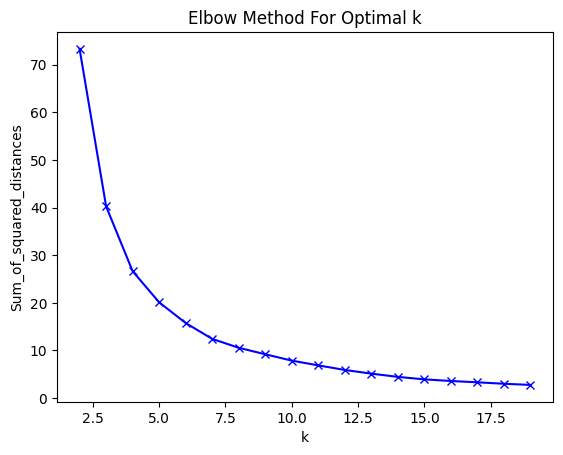

In [75]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [76]:
km_final = KMeans(n_clusters=5)
km_final = km_final.fit(df_rfm_clustering.drop("CustomerID", axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
df_rfm_clustering["cluster_number"] = km_final.predict(df_rfm_clustering.drop("CustomerID", axis=1))

In [78]:
df_rfm_clustering

,CustomerID,recency,frequency,monetary,cluster_number
0,12347.0,0.994652,0.028708,0.015371,3
1,12348.0,0.799465,0.014354,0.006404,1
2,12349.0,0.949198,0.000000,0.006262,3
3,12350.0,0.171123,0.000000,0.001183,4
4,12352.0,0.903743,0.033493,0.008933,3
...,...,...,...,...,...
4332,18280.0,0.256684,0.000000,0.000634,2
4333,18281.0,0.516043,0.000000,0.000278,0
4334,18282.0,0.978610,0.004785,0.000625,3
4335,18283.0,0.989305,0.071770,0.007290,3


In [79]:
cluster_result = df_rfm_clustering.drop(columns=["CustomerID"]).groupby("cluster_number").agg(np.mean)

In [80]:
cluster_result

,recency,frequency,monetary
cluster_number,,,
0,0.584710,0.005609,0.002801
1,0.812988,0.008146,0.003754
2,0.343007,0.002158,0.002080
3,0.953340,0.027441,0.012004
4,0.102887,0.001725,0.001374


--> 클러스터링이 잘되진 않음, frequency와 monetary가 높은것이 안보임, recency에 취중되어 클러스터링 된거 같음.

- recency는 분포가 어느정도 보이나 나머지는 분포가 거의 안보임
- frequency와 monetary에 따라 등급이 나눠진거 같아 보이진 않음

#### 결론적으로는 k-means clustering 분석보다는 heuristic rfm 분석이 더 효과적으로 활용될 수 있을것으로 보임

- 물론, clustering을 최적화하면 더 좋은 결과를 낼 수 있음.
- n을 최적화 하거나 다른 알고리즘 사용

## Insight
- 데이터를 분석할 떄는 다양한 가정과 전제를 먼저 고민한다. 그 이후에 가정/전제를 확인하는 식으로 Insight를 얻는다.
- RFM 분석은 마케팅 및 영업 의사 결정에 큰 도움이 될 수 있는 분석 방법론이다.
- RFM 분석은 score(ntile 기반)=휴리스틱 방법과 ML Clustering 방법이 있고, 데이터에 따라 효율적인 방법이 다르다.